# PCA and KMeans Clustering

This notebook will conduct PCA on the Iris data set, KMeans algorithm on the breast cancer data set, and find the optimal number of clusters in the wine data set.

## Part 1 - PCA on Iris data set

- Working with centered, but not scaled dataset
- Find the first two principal components
- How much of the total variance in the data is captured by first two principal components?

In [2]:
# Import packages
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA

# Load the data
iris = datasets.load_iris()
X, y = iris.data, iris.target

In [3]:
# Center the data set, but do not scale it
X = X - X.mean()
y = y - y.mean()

In [4]:
# Prepare sklearn for PCA
# Tell it that we only want first 2 principal components
pca = PCA(n_components = 2)  

# Train the model on the data set X
components = pca.fit(X) 

In [5]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [6]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [7]:
tot_var = np.sum(pca.explained_variance_ratio_)
print(np.round(tot_var*100, 2), "% of total variance is captured by the first two principal components.")

97.77 % of total variance is captured by the first two principal components.


## Part 2 - KMeans Algorithm on Breast Cancer data set

In [8]:
# Import packages
from sklearn.datasets import load_breast_cancer
from sklearn import cluster
from sklearn import metrics

# Import data set
dataset = load_breast_cancer()
print(type(dataset))
X, y = load_breast_cancer(return_X_y = True)

df = pd.DataFrame(X, columns=dataset.feature_names)
df.head()

<class 'sklearn.utils.Bunch'>


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
# Select only the first 10 features of the dataset
df = df.iloc[:, :10]
df.head()
df.shape

(569, 10)

In [10]:
clusters = cluster.KMeans(n_clusters = 2, random_state = 0)
clusters.fit(X)

KMeans(n_clusters=2, random_state=0)

In [11]:
clusters.cluster_centers_

array([[1.93799237e+01, 2.16945802e+01, 1.28231298e+02, 1.18592977e+03,
        1.01294580e-01, 1.48612977e-01, 1.76939466e-01, 1.00698779e-01,
        1.91539695e-01, 6.06029008e-02, 7.42803817e-01, 1.22253817e+00,
        5.25058015e+00, 9.56781679e+01, 6.59868702e-03, 3.21766947e-02,
        4.24197710e-02, 1.56739847e-02, 2.03039695e-02, 3.95338931e-03,
        2.37094656e+01, 2.89126718e+01, 1.58496183e+02, 1.75302290e+03,
        1.40424733e-01, 3.57757710e-01, 4.49306107e-01, 1.92431069e-01,
        3.11881679e-01, 8.61654962e-02],
       [1.25562991e+01, 1.85703653e+01, 8.11234703e+01, 4.96061872e+02,
        9.48844977e-02, 9.10998174e-02, 6.24377642e-02, 3.34325434e-02,
        1.78057991e-01, 6.34540183e-02, 3.04190868e-01, 1.21515320e+00,
        2.15288059e+00, 2.37852922e+01, 7.17326256e-03, 2.34746895e-02,
        2.87455128e-02, 1.06363242e-02, 2.06135799e-02, 3.74750297e-03,
        1.40439018e+01, 2.47095434e+01, 9.19375114e+01, 6.19647945e+02,
        1.29959110e-01,

In [12]:
# KMeans prediction
y_pred = clusters.predict(X)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [13]:
# Evaluate the performance of your clustering against the known labels
# How well does your clustering actually predict the actual labels of the observation?

# Confusion Matrix
metrics.confusion_matrix(y, y_pred)

# Does a fairly good job of predicting. 
# There's a large number of false positives and false negatives.
# However, it has a larger number correct labels than incorrect ones. 

array([[130,  82],
       [  1, 356]])

## Part 3 - Optimal number of clusters with Wine data set

In [14]:
# Import packages
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import load_wine

# Load data set
dataset = load_wine()
print(type(dataset))
X, y = load_wine(return_X_y = True)
df = pd.DataFrame(X, columns=dataset.feature_names)
df.head()

<class 'sklearn.utils.Bunch'>


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [15]:
# What is the optimal number of clusters? 
# Silhouette coefficient measure cluster cohesion 

clusters = cluster.KMeans(n_clusters = 2, random_state = 0)
clusters.fit(X)
y_pred = clusters.predict(X)

In [16]:
clusters.labels_

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [17]:
silhouette_score(X, clusters.labels_)

0.6568536504294319

In [18]:
k = 2
x_axis = []
y_axis = []
print("Cluster\tSilhouette Score")
for i in range(20):
    clusters = cluster.KMeans(n_clusters = k, random_state = 0)
    clusters.fit(X)
    y_pred = clusters.predict(X)
    ss = silhouette_score(X, clusters.labels_)
    print(k,"\t",np.round(ss,2))
    x_axis.append(k)
    y_axis.append(ss)
    k += 1  

Cluster	Silhouette Score
2 	 0.66
3 	 0.57
4 	 0.56
5 	 0.55
6 	 0.57
7 	 0.56
8 	 0.55
9 	 0.53
10 	 0.52
11 	 0.51
12 	 0.52
13 	 0.51
14 	 0.51
15 	 0.5
16 	 0.48
17 	 0.49
18 	 0.48
19 	 0.48
20 	 0.46
21 	 0.43


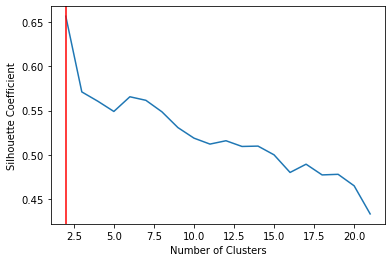

In [19]:
import matplotlib.pyplot as plt

plt.plot(x_axis,y_axis)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.axvline(x=2, color="red");

The optimal number of clusters is 2. At 2 clusters, the silhouette coefficient is the highest at 0.66. This result aligns with the fact there are two types of wines in the data set, red and white.